In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('/content/중간점검.xlsx')

In [3]:
df

,기종명(모델명),출고가,색상,"배터리 용량(mAh, Typical)",최대 통화 시간 (시간),인터넷 사용 시간(Wi-Fi),동영상 재생 시간,오디오 재생 시간,무게(g),크기(Main Display),해상도(Main),전면 카메라 - 화소,CPU 속도,"스토리지(저장 용량) (GB,TB)",ROM(GB),해상도(픽셀 수),CPU 속도2,전면 카메라 - 화소(MP),"배터리 용량(mAh, Typical)2",무게(g)2,분류,출고가2,최대 통화 시간 (시간)2,인터넷 사용 시간(Wi-Fi)2,동영상 재생 시간2,오디오 재생 시간2,크기(Main Display)2,Price,Battery,Call Time,Internet Time,Video Time,Audio Time,Weight,Size,Resolution,Camera Resolution,CPU Speed,저장용량(GB),색상2,Color,Distinction
0,Galaxy S5,868000,블랙,2800,20,13,13,75,145,1294,1920x1080,"CMOS, 2.0 MP",2.5 GHz,32,32,2073600,2.50,2.0,2800,145,갤럭시 S시리즈,868000,20,13,13,75,1294,4,1,2,1,1,4,1,6,3,1,2,1,블랙,1,1
1,Galaxy S5,868000,화이트,2800,20,13,13,75,145,1294,1920x1080,"CMOS, 2.0 MP",2.5 GHz,32,32,2073600,2.50,2.0,2800,145,갤럭시 S시리즈,868000,20,13,13,75,1294,4,1,2,1,1,4,1,6,3,1,2,1,화이트,2,1
2,Galaxy S5,868000,블루,2800,20,13,13,75,145,1294,1920x1080,"CMOS, 2.0 MP",2.5 GHz,32,32,2073600,2.50,2.0,2800,145,갤럭시 S시리즈,868000,20,13,13,75,1294,4,1,2,1,1,4,1,6,3,1,2,1,블루,3,1
3,Galaxy S5,868000,골드,2800,20,13,13,75,145,1294,1920x1080,"CMOS, 2.0 MP",2.5 GHz,32,32,2073600,2.50,2.0,2800,145,갤럭시 S시리즈,868000,20,13,13,75,1294,4,1,2,1,1,4,1,6,3,1,2,1,골드,4,1
4,Galaxy S5 광대역 LTE-A,940500,블랙,2800,18,11,13,67,145,1292,2560x1440,CMOS 2.0 MP,2.5GHz,32,32,3686400,2.50,2.0,2800,145,갤럭시 S시리즈,940500,18,11,13,67,1292,5,1,1,1,1,3,1,6,4,1,2,1,블랙,1,1
5,Galaxy S5 광대역 LTE-A,940500,화이트,2800,18,11,13,67,145,1292,2560x1440,CMOS 2.0 MP,2.5GHz,32,32,3686400,2.50,2.0,2800,145,갤럭시 S시리즈,940500,18,11,13,67,1292,5,1,1,1,1,3,1,6,4,1,2,1,화이트,2,1
6,Galaxy S5 광대역 LTE-A,940500,블루,2800,18,11,13,67,145,1292,2560x1440,CMOS 2.0 MP,2.5GHz,32,32,3686400,2.50,2.0,2800,145,갤럭시 S시리즈,940500,18,11,13,67,1292,5,1,1,1,1,3,1,6,4,1,2,1,블루,3,1
7,Galaxy S5 광대역 LTE-A,940500,골드,2800,18,11,13,67,145,1292,2560x1440,CMOS 2.0 MP,2.5GHz,32,32,3686400,2.50,2.0,2800,145,갤럭시 S시리즈,940500,18,11,13,67,1292,5,1,1,1,1,3,1,6,4,1,2,1,골드,4,1
8,Galaxy S6,854000,사파이어,2550,17,12,13,49,138,1292,2560x1440,CMOS 5.0 MP,"2.1GHz, 1.5GHz",32 GB,32,3686400,2.10,5.0,2550,138,갤럭시 S시리즈,854000,17,12,13,49,1292,4,1,1,1,1,1,1,6,4,1,2,1,사파이어,3,1
9,Galaxy S6,854000,펄,2550,17,12,13,49,138,1292,2560x1440,CMOS 5.0 MP,"2.1GHz, 1.5GHz",32 GB,32,3686400,2.10,5.0,2550,138,갤럭시 S시리즈,854000,17,12,13,49,1292,4,1,1,1,1,1,1,6,4,1,2,1,펄,1,1


# 2차 클러스터링 시작하기

In [4]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score, silhouette_score

In [5]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum

# 폰트 캐시 업데이트
!sudo fc-cache -fv

# 시스템 캐시 삭제
!rm ~/.cache/matplotlib -rf

# matplotlib에서 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'  # 사용할 폰트 설정

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [6]:
from sklearn.decomposition import PCA

# K-means 임의로 한 번 실행해보기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


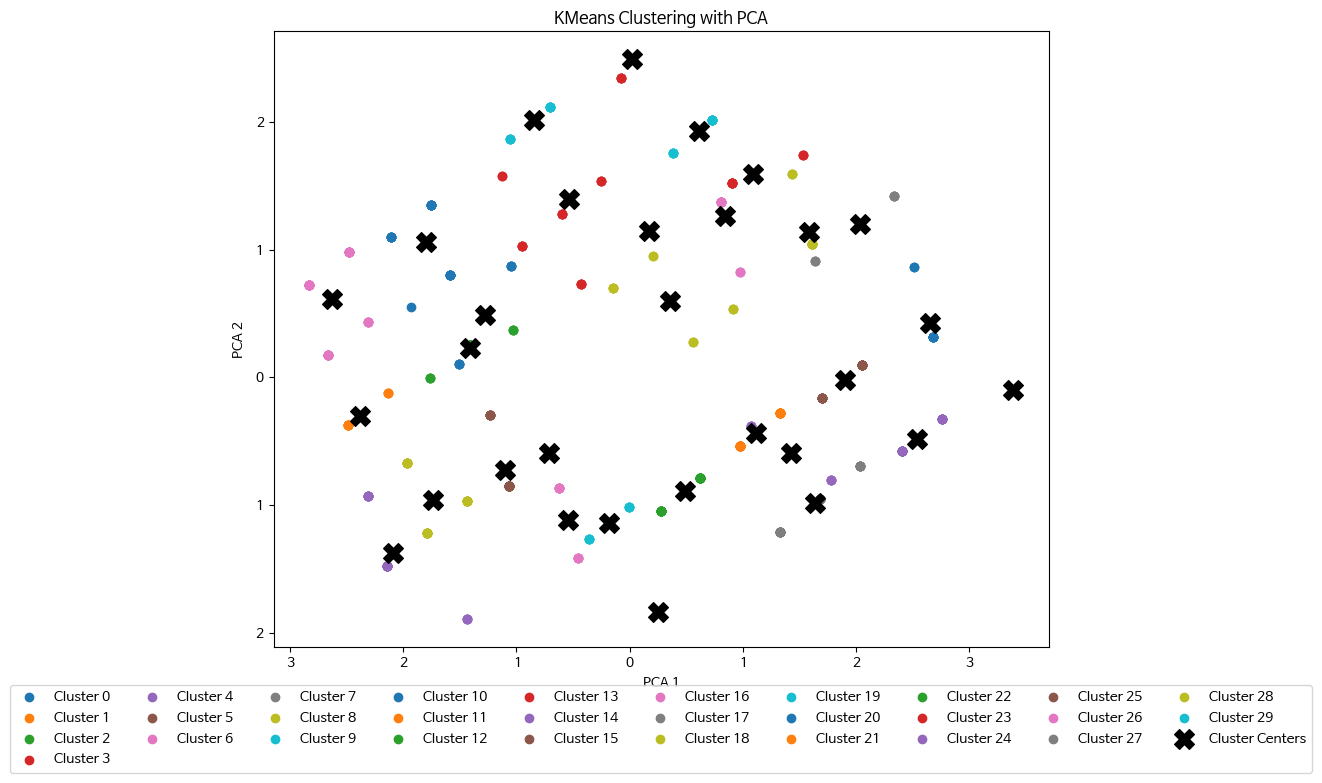

In [7]:
columns_to_select = ['저장용량(GB)', 'Camera Resolution', 'Battery', 'Weight', 'Price']

X = df[columns_to_select]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=30, random_state=0).fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))

for cluster_num in range(30):
    members = X_pca[kmeans.labels_ == cluster_num]
    plt.scatter(members[:, 0], members[:, 1], label=f'Cluster {cluster_num}')

cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], s=200, c='black', marker='X', label='Cluster Centers')

plt.title('KMeans Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=10)

plt.show()

# 최적의 K-means의 클러스터의 수 구하기
## 이번에는 1차 과정이라 다르게 시각적인 표현도 추가했다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

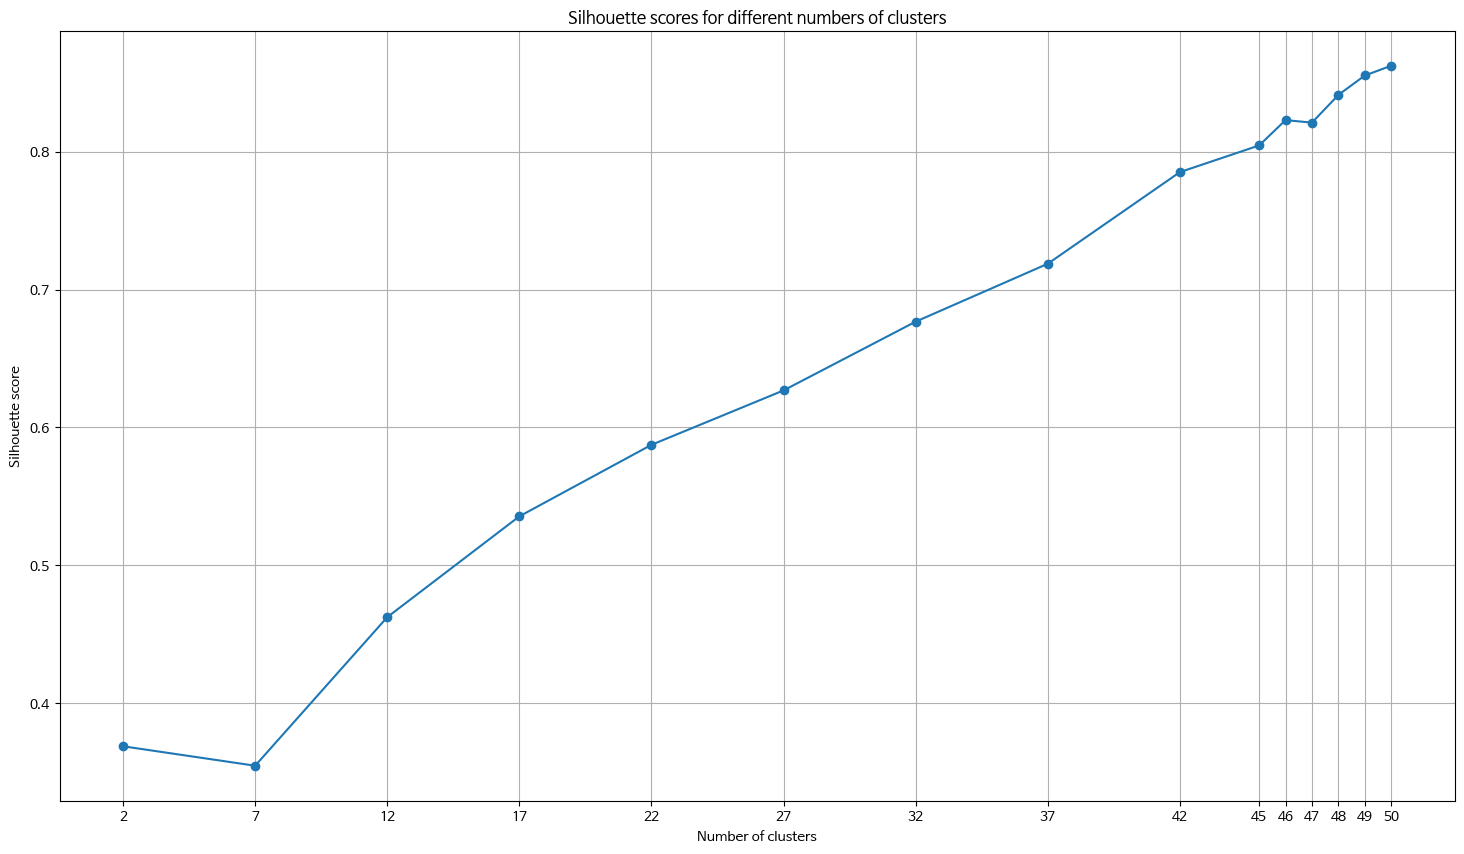

The optimal number of clusters is 50 with a silhouette score of 0.8625438789469346.


In [8]:
range_n_clusters = list(range(2, 45, 5)) + list(range(45, 51))

best_n_clusters = 0
best_silhouette_score = -1

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    if silhouette_avg > best_silhouette_score:
        best_n_clusters = n_clusters
        best_silhouette_score = silhouette_avg

plt.figure(figsize=(18, 10))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette scores for different numbers of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(range_n_clusters)
plt.grid(True)

plt.show()

print(f"The optimal number of clusters is {best_n_clusters} with a silhouette score of {best_silhouette_score}.")

# 최적의 클러스터의 수 50개로 다시 한 번 K-means 클러스터링 시각화

# 1차 과정에서는 13개의 변수들을 선택했지만 2차 과정에서는 5개의 변수들로만 클러스터링을 시작했다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


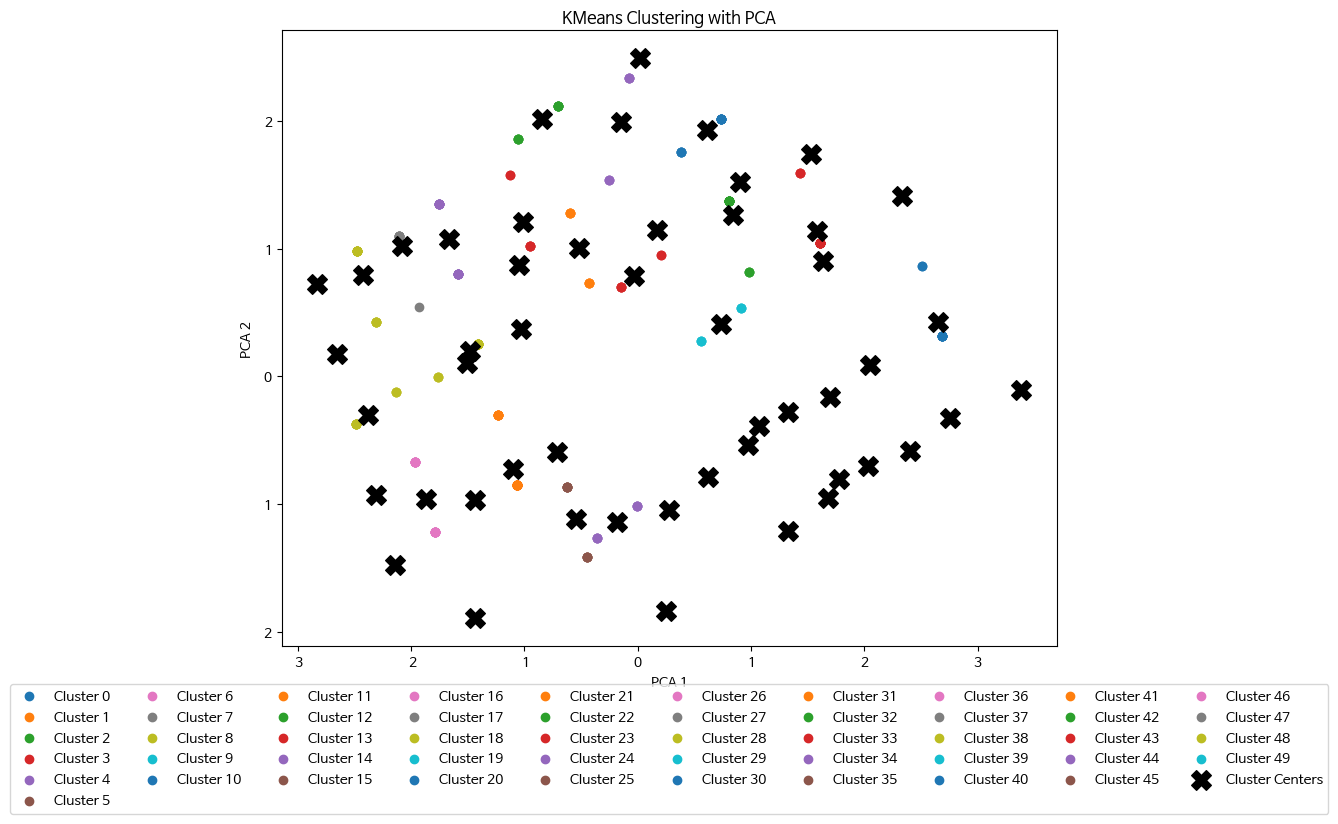

In [9]:
columns_to_select = ['저장용량(GB)', 'Camera Resolution', 'Battery', 'Weight', 'Price']

X = df[columns_to_select]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans 최적의 클러스터링 수 = 50
kmeans = KMeans(n_clusters=50, random_state=0).fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))

for cluster_num in range(50):
    members = X_pca[kmeans.labels_ == cluster_num]
    plt.scatter(members[:, 0], members[:, 1], label=f'Cluster {cluster_num}')

cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], s=200, c='black', marker='X', label='Cluster Centers')

plt.title('KMeans Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=10)

plt.show()

# K-means의 실루엣 스코어 계산

In [10]:
sil_score = silhouette_score(X_scaled, kmeans.labels_)

print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.8625438789469346


# 실루엣 스코어가 눈에 띄게 좋아졌다.

## 13개의 변수들로 이루어진 K-means의 실루엣 스코어: 0.3415
## 5개의 변수들로 이루어진 K-means의 실루엣 스코어: 0.8625

# DBSCAN의 최적의 파라미터 구하기

In [11]:
import numpy as np

columns_to_select = ['저장용량(GB)', 'Camera Resolution', 'Battery', 'Weight', 'Price']

X = df[columns_to_select]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_score = -1
best_eps = None
best_min_samples = None

for eps in np.arange(0.1, 3, 0.1):
    for min_samples in range(2, 15):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = dbscan.labels_

        if len(set(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best Silhouette Score: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

Best Silhouette Score: 0.9981096362078865
Best eps: 0.1
Best min_samples: 2


# DBSCAN의 최적의 파라미터 시각적으로 표현하기

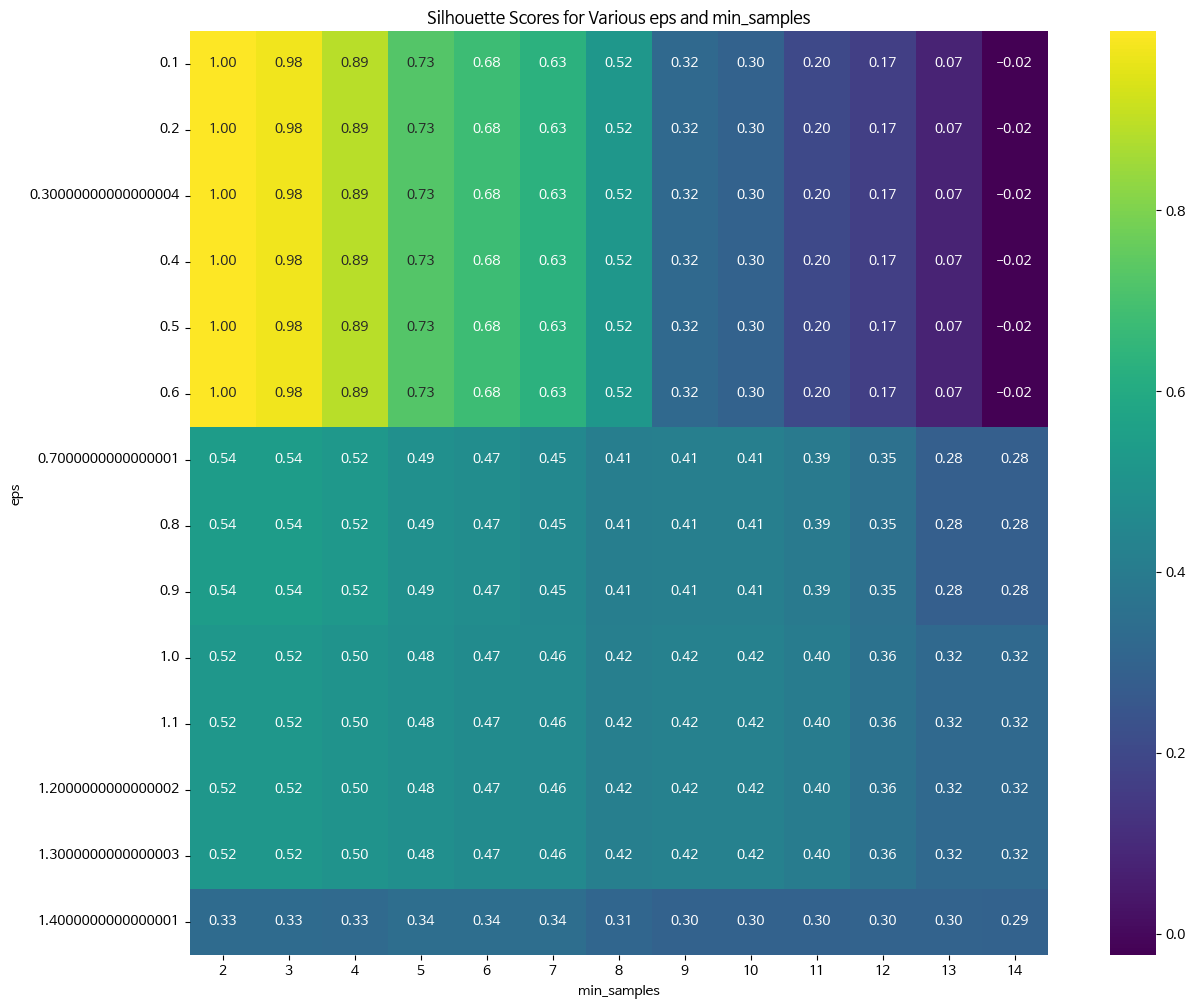

In [12]:
columns_to_select = ['저장용량(GB)', 'Camera Resolution', 'Battery', 'Weight', 'Price']
X = df[columns_to_select]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(2, 15)
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = dbscan.labels_

        if len(set(labels)) - (1 if -1 in labels else 0) > 1:
            score = silhouette_score(X_scaled, labels)
            silhouette_scores[i, j] = score
        else:
            silhouette_scores[i, j] = np.nan

silhouette_df = pd.DataFrame(silhouette_scores, index=eps_values, columns=min_samples_values)

plt.figure(figsize=(16, 12))
sns.heatmap(silhouette_df, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Silhouette Scores for Various eps and min_samples')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.show()

# 표를 보면 eps는 0.1 ~ 0.6까지 min_samples는 2개를 적용하면 최적의 파라미터인 것을 시각적으로 알 수 있다.

# DBSCAN 클러스터링 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


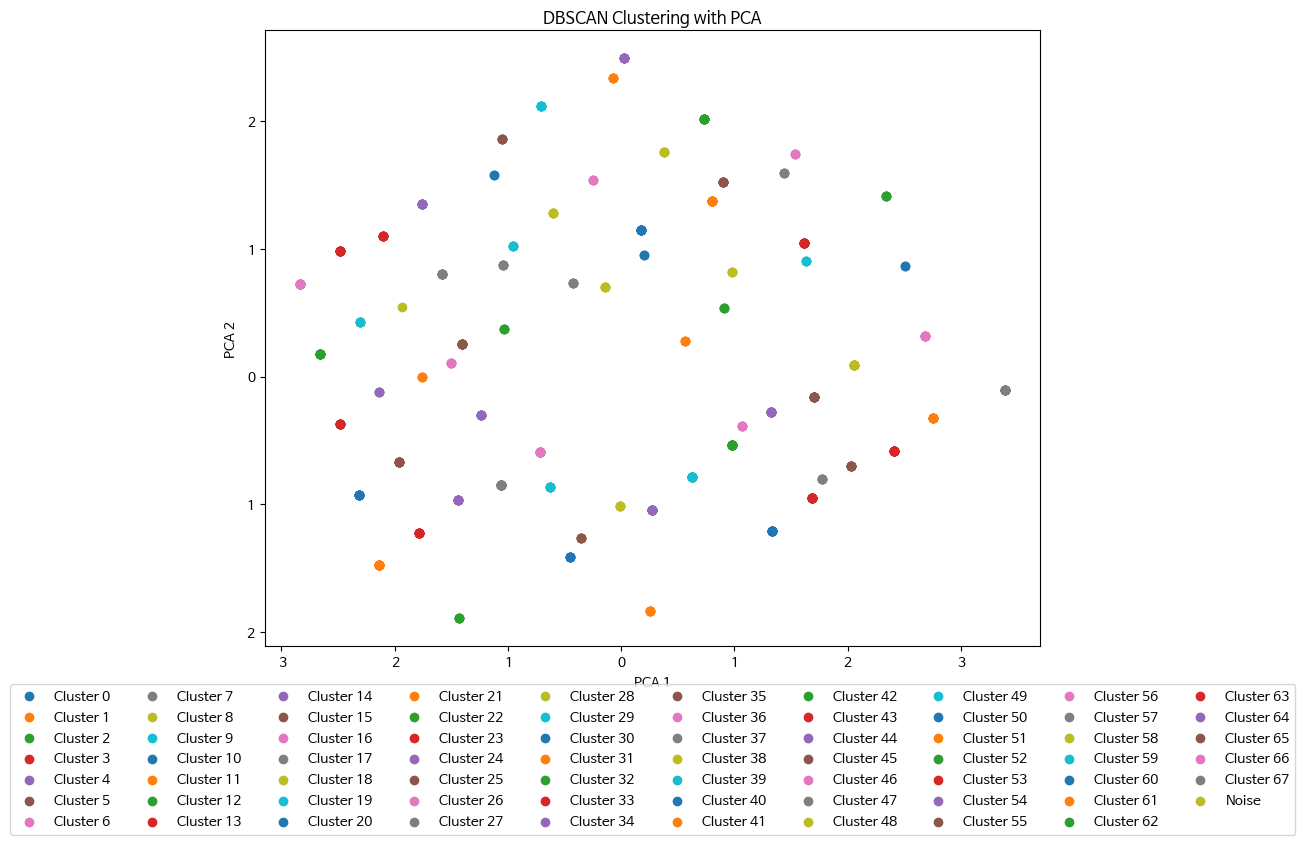

In [13]:
columns_to_select = ['저장용량(GB)', 'Camera Resolution', 'Battery', 'Weight', 'Price']

X = df[columns_to_select]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.1, min_samples=2).fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))

# 클러스터 번호 가져오기 (노이즈는 -1로 표시됨)
clusters = set(dbscan.labels_)

# 각 클러스터와 노이즈에 대해 산점도 그리기
for cluster_num in clusters:
    members = X_pca[dbscan.labels_ == cluster_num]
    if cluster_num == -1:
        label = 'Noise'
    else:
        label = f'Cluster {cluster_num}'
    plt.scatter(members[:, 0], members[:, 1], label=label)

plt.title('DBSCAN Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=10)

plt.show()

# DBSCAN에서 "노이즈"는 어떤 클러스터에도 속하지 않는 데이터 포인트
## 노이즈 포인트는 주어진 eps와 min_samples 조건에 충족하지 못하는 포인트 즉 충분히 많은 이웃이 없거나 클러스터의 코어 포인트 또는 보더 포인트로 분류되지 않은 포인트를 노이

# 노이즈는 이상치나 다른 클러스터와 멀리 떨어진 포인트일 수 있으며 이러한 포인트들은 DBSCAN이 클러스터링 과정에서 제외합

# 만약에 노이즈를 제외하고 실행할 경우 DBSCAN에서의 실루엣 스코어를 하는 건 의미가 없다.

### 1차 과정에서도 노이즈 포인트를 제외 했었는데 설명이 없어서 지금이라도 설명을 했습니다.
(양해 바랍니다.)

In [14]:
# DBSCAN 클러스터링의 레이블 가져오기
labels = dbscan.labels_

# 레이블이 -1인 데이터 포인트의 개수 세기 (노이즈)
noise_count = (labels == -1).sum()

print(f"Number of noise points: {noise_count}")

Number of noise points: 1


In [15]:
# 클러스터 레이블 가져오기
labels = dbscan.labels_

# 노이즈 포인트(-1 레이블)를 제외하고 실루엣 스코어 계산
sil_score = silhouette_score(X_scaled, labels, metric='euclidean')

print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.9981096362078865


# DBSCAN도 눈에 띄게 실루엣 스코어가 좋아진 걸 확인 할 수 있다.

## 13개의 변수들로 이루어진 DBSCAN의 실루엣 스코어 0.3501
## 5개의 변수들로 이루어진 DBSCAN의 실루엣 스코어 0.9981

In [16]:
from scipy.cluster.hierarchy import linkage, fcluster

# 계층적 클러스터링의 최적의 분할 최대 거리 구하기
## 이 부분도 시각적으로 표현할려고 했는데 시각적으로 표현하기엔 너무 복잡해서 생략을 했습니다.(양해 바랍니다.)

In [17]:
columns_to_select = ['저장용량(GB)', 'Camera Resolution', 'Battery', 'Weight', 'Price']

X = df[columns_to_select]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Z = linkage(X_scaled, method='ward')

best_silhouette_score = -1
best_max_d = 0

for max_d in np.arange(1, 44, 1):
    clusters = fcluster(Z, t=max_d, criterion='distance')

    score = silhouette_score(X_scaled, clusters)

    print(f"max_d: {max_d}, Silhouette Score: {score}")

    if score > best_silhouette_score:
        best_silhouette_score = score
        best_max_d = max_d

print(f"Best max_d: {best_max_d}, Best Silhouette Score: {best_silhouette_score}")

max_d: 1, Silhouette Score: 0.9963097064859636
max_d: 2, Silhouette Score: 0.882403718018521
max_d: 3, Silhouette Score: 0.731638693264322
max_d: 4, Silhouette Score: 0.6379365204572733
max_d: 5, Silhouette Score: 0.6141915179528654
max_d: 6, Silhouette Score: 0.5323462016468868
max_d: 7, Silhouette Score: 0.5018904457551748
max_d: 8, Silhouette Score: 0.4595677919544886
max_d: 9, Silhouette Score: 0.4595677919544886
max_d: 10, Silhouette Score: 0.4304873087789402
max_d: 11, Silhouette Score: 0.3825771178292976
max_d: 12, Silhouette Score: 0.3729695795105541
max_d: 13, Silhouette Score: 0.36402873687391873
max_d: 14, Silhouette Score: 0.36402873687391873
max_d: 15, Silhouette Score: 0.36402873687391873
max_d: 16, Silhouette Score: 0.36402873687391873
max_d: 17, Silhouette Score: 0.36402873687391873
max_d: 18, Silhouette Score: 0.32707297176278627
max_d: 19, Silhouette Score: 0.333111754697164
max_d: 20, Silhouette Score: 0.3485809207960006
max_d: 21, Silhouette Score: 0.348580920796000

# 계층적 클러스터의 최적의 파라미터 구하기(2부터 70까지 중에서)

In [18]:
best_silhouette = -1
best_num_clusters = 0

for num_clusters in range(2, 100):
    clusters = fcluster(Z, t=num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(X_scaled, clusters)

    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_num_clusters = num_clusters

print(f"The best number of clusters is {best_num_clusters} with a silhouette score of {best_silhouette}")

The best number of clusters is 69 with a silhouette score of 0.9981096362078865


# 시각적으로 표현하기

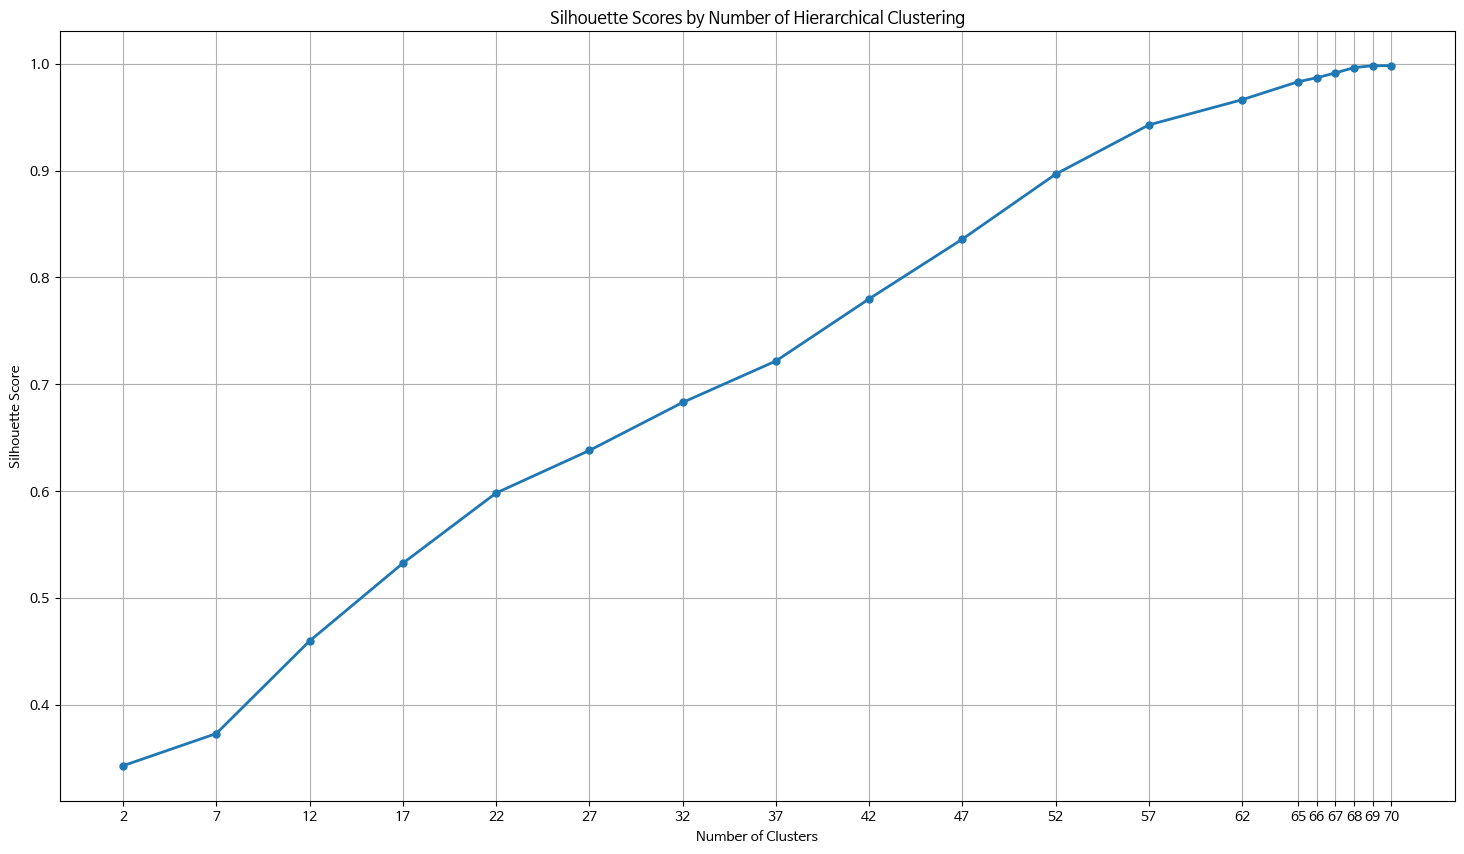

In [19]:
range_n_clusters = list(range(2, 65, 5)) + list(range(65, 71))
silhouette_avg_values = []

for n_clusters in range_n_clusters:
    clusters = fcluster(Z, t=n_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette_avg_values.append(silhouette_avg)

plt.figure(figsize=(18, 10))
plt.plot(range_n_clusters, silhouette_avg_values, marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Silhouette Scores by Number of Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# 계층적 클러스터링 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


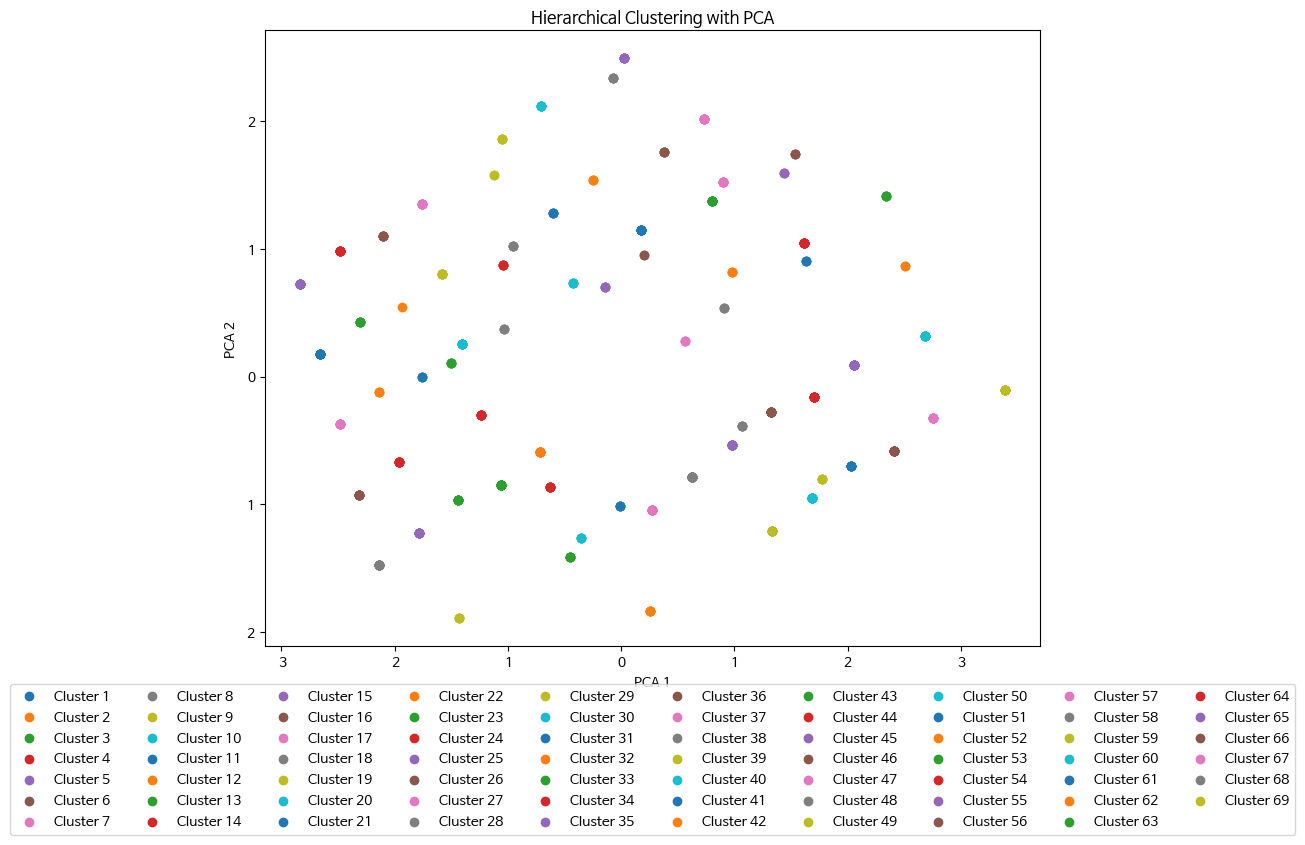

In [20]:
columns_to_select = ['저장용량(GB)', 'Camera Resolution', 'Battery', 'Weight', 'Price']

X = df[columns_to_select]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Z = linkage(X_scaled, method='ward')

# 클러스터 할당
max_d = 1
number_of_clusters = 69
clusters = fcluster(Z, t=number_of_clusters, criterion='maxclust')


pca = PCA(n_components=2).fit(X_scaled)
X_pca = pca.transform(X_scaled)

plt.figure(figsize=(10, 8))
for i in set(clusters):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i}')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=10)
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [21]:
sil_score_hierarchical = silhouette_score(X_scaled, clusters, metric='euclidean')

print(f"Silhouette Score (Hierarchical Clustering): {sil_score_hierarchical}")

Silhouette Score (Hierarchical Clustering): 0.9981096362078865


# 계층적 클러스터링도 실루엣 스코어가 많이 좋아졌다.

## 13개의 변수들을 이용한 계층적 클러스터링 실루엣 스코어: 0.2808
## 5개의 변수들을 이용한 계층적 클러스터링 실루엣 스코어: 0.9981

# 이제 본격적으로 사용자 추천 시스템을 만들자

## 사용자가 고를 수 있는 조건: 출고가, 배터리 용량, 무게, 카메라 화질, ROM

# **사용자 추천 시스템의 조건 **

## 1. 사용자의 원하는 조건과 일치하는 특성이 5개인 데이터를 첫 번째 우선순위로 필터링합니다.
## 2. 첫 번째 우선순위의 결과가 5개 미만이면, 특성이 4개 일치하는 데이터를 두 번째 우선순위로 필터링합니다.
## 3. 첫 번째와 두 번째 우선순위의 결과 합이 5개 미만이면, 특성이 3개 일치하는 데이터를 세 번째 우선순위로 필터링합니다.
## 4. 이렇게 선택된 결과는 각 우선순위에 따라 출력됩니다.

# ***K-means를 기반으로 한 추천 시스템***

In [31]:
import ipywidgets as widgets
from IPython.display import display, clear_output

selected_indices = []

# 드롭다운 위젯 생성 및 레이블 붙이기
price_dropdown = widgets.Dropdown(
    options=[
        ('10만원 이상 ~ 30만원 미만', 1),
        ('30만원 이상 ~ 50만원 미만', 2),
        ('50만원 이상 ~ 70만원 미만', 3),
        ('70만원 이상 ~ 90만원 미만', 4),
        ('90만원 이상', 5)
    ],
    description='출고가:'
)

battery_dropdown = widgets.Dropdown(
    options=[
        ('3000mAh 미만', 1),
        ('3000mAh 이상 ~ 3500mAh 미만', 2),
        ('3500mAh 이상 ~ 4000mAh 미만', 3),
        ('4000mAh 이상 ~ 4500mAh 미만', 4),
        ('4500mAh 이상', 5)
    ],
    description='배터리 용량:'
)

weight_dropdown = widgets.Dropdown(
    options=[
        ('160g 미만', 1),
        ('160g 이상 ~ 200g 미만', 2),
        ('200g 이상', 3)
    ],
    description='무게:'
)

camera_dropdown = widgets.Dropdown(
    options=[
        ('10.0MP 미만', 1),
        ('10.0MP 이상 ~ 20.0MP 미만', 2),
        ('20.0MP 이상', 3)
    ],
    description='카메라 화질:'
)

storage_dropdown = widgets.Dropdown(
    options=[
        ('128GB 미만', 1),
        ('128GB 이상 ~ 256GB 이하', 2),
        ('256GB 초과', 3)
    ],
    description='ROM:'
)

button = widgets.Button(description='Submit')

# 위젯 출력
output = widgets.Output()
display(price_dropdown, battery_dropdown, weight_dropdown, camera_dropdown, storage_dropdown, button, output)

def on_button_clicked(b):
    with output:
        clear_output()
        global selected_indices
        selected_indices.clear()  # 버튼이 클릭될 때마다 리스트를 초기화

        # 사용자 입력 받기
        user_input = {
            'Price': price_dropdown.value,
            'Weight': weight_dropdown.value,
            'Battery': battery_dropdown.value,
            'Camera Resolution': camera_dropdown.value,
            '저장용량(GB)': storage_dropdown.value
        }

        # 선택된 칼럼만 사용
        columns_to_select = ['저장용량(GB)', 'Camera Resolution', 'Battery', 'Weight', 'Price']
        X = df[columns_to_select]

        # 데이터 스케일링
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # K-Means 클러스터링 수행
        kmeans = KMeans(n_clusters=50)
        clusters = kmeans.fit_predict(X_scaled)
        df['Cluster'] = clusters  # 클러스터링 결과를 데이터프레임에 추가

        # 결과 출력
        for min_matches in range(5, 2, -1):
            priority_df = filter_data(df, clusters, user_input, min_matches)
            if len(priority_df) > 0:
                # 이미 선택된 제품 제외
                priority_df = priority_df[~priority_df.index.isin(selected_indices)]
                # 순위에 맞는 제품을 selected_indices에 추가
                selected_indices.extend(priority_df.index.tolist())
                display(priority_df.assign(Priority=f'{6-min_matches}순위').set_index('Priority'))

            if len(priority_df) >= 5 or (min_matches == 3 and len(priority_df) > 0):
                break

def filter_data(df, labels, user_input, min_matches):
    matching_rows = []
    for index, row in df.iterrows():
        if index in selected_indices:  # 이미 선택된 제품 인덱스를 체크하여 건너뜀
            continue
        matches = sum([row[key] == value for key, value in user_input.items()])
        if matches >= min_matches:
            matching_rows.append(index)

    return df.loc[matching_rows][['기종명(모델명)', '색상', '출고가', '배터리 용량(mAh, Typical)', '무게(g)','전면 카메라 - 화소', '스토리지(저장 용량) (GB,TB)']]

button.on_click(on_button_clicked)

Dropdown(description='출고가:', options=(('10만원 이상 ~ 30만원 미만', 1), ('30만원 이상 ~ 50만원 미만', 2), ('50만원 이상 ~ 70만원 미만'…

Dropdown(description='배터리 용량:', options=(('3000mAh 미만', 1), ('3000mAh 이상 ~ 3500mAh 미만', 2), ('3500mAh 이상 ~ 400…

Dropdown(description='무게:', options=(('160g 미만', 1), ('160g 이상 ~ 200g 미만', 2), ('200g 이상', 3)), value=1)

Dropdown(description='카메라 화질:', options=(('10.0MP 미만', 1), ('10.0MP 이상 ~ 20.0MP 미만', 2), ('20.0MP 이상', 3)), va…

Dropdown(description='ROM:', options=(('128GB 미만', 1), ('128GB 이상 ~ 256GB 이하', 2), ('256GB 초과', 3)), value=1)

Button(description='Submit', style=ButtonStyle())

Output()

# ***DBSCAN을 기반으로 한 추천 시스템***

In [29]:
price_dropdown = widgets.Dropdown(
    options=[
        ('10만원 이상 ~ 30만원 미만', 1),
        ('30만원 이상 ~ 50만원 미만', 2),
        ('50만원 이상 ~ 70만원 미만', 3),
        ('70만원 이상 ~ 90만원 미만', 4),
        ('90만원 이상', 5)
    ],
    description='출고가:'
)

battery_dropdown = widgets.Dropdown(
    options=[
        ('3000mAh 미만', 1),
        ('3000mAh 이상 ~ 3500mAh 미만', 2),
        ('3500mAh 이상 ~ 4000mAh 미만', 3),
        ('4000mAh 이상 ~ 4500mAh 미만', 4),
        ('4500mAh 이상', 5)
    ],
    description='배터리 용량:'
)

weight_dropdown = widgets.Dropdown(
    options=[
        ('160g 미만', 1),
        ('160g 이상 ~ 200g 미만', 2),
        ('200g 이상', 3)
    ],
    description='무게:'
)

camera_dropdown = widgets.Dropdown(
    options=[
        ('10.0MP 미만', 1),
        ('10.0MP 이상 ~ 20.0MP 미만', 2),
        ('20.0MP 이상', 3)
    ],
    description='카메라 화질:'
)

storage_dropdown = widgets.Dropdown(
    options=[
        ('128GB 미만', 1),
        ('128GB 이상 ~ 256GB 이하', 2),
        ('256GB 초과', 3)
    ],
    description='ROM:'
)

button = widgets.Button(description='Submit')


output = widgets.Output()
display(price_dropdown, battery_dropdown, weight_dropdown, camera_dropdown, storage_dropdown, button, output)

def on_button_clicked(b):
    with output:
        clear_output()


        user_input = {
            'Price': price_dropdown.value,
            'Weight': weight_dropdown.value,
            'Battery': battery_dropdown.value,
            'Camera Resolution': camera_dropdown.value,
            '저장용량(GB)': storage_dropdown.value
        }


        columns_to_select = ['저장용량(GB)', 'Camera Resolution', 'Battery', 'Weight', 'Price']
        X = df[columns_to_select]


        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # DBSCAN 클러스터링 수행
        dbscan = DBSCAN(eps=0.1, min_samples=2)
        clusters = dbscan.fit_predict(X_scaled)
        df['Cluster'] = clusters

        # 노이즈 제외
        df_no_noise = df[df['Cluster'] != -1]

        # 결과 출력
        for min_matches in range(5, 2, -1):
            priority_df = filter_data(df_no_noise, clusters, user_input, min_matches)
            if len(priority_df) > 0:
                display(priority_df.assign(Priority=f'{6-min_matches}순위').set_index('Priority'))

            if len(priority_df) >= 5 or (min_matches == 3 and len(priority_df) > 0):
                break

def filter_data(df, labels, user_input, min_matches):
    matching_rows = []
    for index, row in df.iterrows():
        matches = sum([row[key] == value for key, value in user_input.items()])
        if matches >= min_matches:
            matching_rows.append(index)

    return df.loc[matching_rows][['기종명(모델명)', '색상', '출고가', '배터리 용량(mAh, Typical)', '무게(g)','전면 카메라 - 화소', '스토리지(저장 용량) (GB,TB)']]

button.on_click(on_button_clicked)

Dropdown(description='출고가:', options=(('10만원 이상 ~ 30만원 미만', 1), ('30만원 이상 ~ 50만원 미만', 2), ('50만원 이상 ~ 70만원 미만'…

Dropdown(description='배터리 용량:', options=(('3000mAh 미만', 1), ('3000mAh 이상 ~ 3500mAh 미만', 2), ('3500mAh 이상 ~ 400…

Dropdown(description='무게:', options=(('160g 미만', 1), ('160g 이상 ~ 200g 미만', 2), ('200g 이상', 3)), value=1)

Dropdown(description='카메라 화질:', options=(('10.0MP 미만', 1), ('10.0MP 이상 ~ 20.0MP 미만', 2), ('20.0MP 이상', 3)), va…

Dropdown(description='ROM:', options=(('128GB 미만', 1), ('128GB 이상 ~ 256GB 이하', 2), ('256GB 초과', 3)), value=1)

Button(description='Submit', style=ButtonStyle())

Output()

# ***계층적 클러스터링을 기반으로 한 추천 시스템***

In [30]:
price_dropdown = widgets.Dropdown(
    options=[
        ('10만원 이상 ~ 30만원 미만', 1),
        ('30만원 이상 ~ 50만원 미만', 2),
        ('50만원 이상 ~ 70만원 미만', 3),
        ('70만원 이상 ~ 90만원 미만', 4),
        ('90만원 이상', 5)
    ],
    description='출고가:'
)

battery_dropdown = widgets.Dropdown(
    options=[
        ('3000mAh 미만', 1),
        ('3000mAh 이상 ~ 3500mAh 미만', 2),
        ('3500mAh 이상 ~ 4000mAh 미만', 3),
        ('4000mAh 이상 ~ 4500mAh 미만', 4),
        ('4500mAh 이상', 5)
    ],
    description='배터리 용량:'
)

weight_dropdown = widgets.Dropdown(
    options=[
        ('160g 미만', 1),
        ('160g 이상 ~ 200g 미만', 2),
        ('200g 이상', 3)
    ],
    description='무게:'
)

camera_dropdown = widgets.Dropdown(
    options=[
        ('10.0MP 미만', 1),
        ('10.0MP 이상 ~ 20.0MP 미만', 2),
        ('20.0MP 이상', 3)
    ],
    description='카메라 화질:'
)

storage_dropdown = widgets.Dropdown(
    options=[
        ('128GB 미만', 1),
        ('128GB 이상 ~ 256GB 이하', 2),
        ('256GB 초과', 3)
    ],
    description='ROM:'
)

button = widgets.Button(description='Submit')


output = widgets.Output()
display(price_dropdown, battery_dropdown, weight_dropdown, camera_dropdown, storage_dropdown, button, output)

selected_indices = []

def on_button_clicked(b):
    with output:
        clear_output()
        global selected_indices
        selected_indices = []  # 버튼이 클릭될 때마다 리스트를 초기화

        user_input = {
            'Price': price_dropdown.value,
            'Weight': weight_dropdown.value,
            'Battery': battery_dropdown.value,
            'Camera Resolution': camera_dropdown.value,
            '저장용량(GB)': storage_dropdown.value
        }

        columns_to_select = ['저장용량(GB)', 'Camera Resolution', 'Battery', 'Weight', 'Price']
        X = df[columns_to_select]

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # 계층적 클러스터링 수행
        Z = linkage(X_scaled, method='ward')
        clusters = fcluster(Z, t=69, criterion='maxclust')

        for min_matches in range(5, 2, -1):
            priority_df = filter_data(df, clusters, user_input, min_matches, selected_indices)
            if len(priority_df) > 0:
                selected_indices.extend(priority_df.index.tolist())
                display(priority_df.assign(Priority=f'{6-min_matches}순위').set_index('Priority'))

            if len(priority_df) >= 5 or (min_matches == 3 and len(priority_df) > 0):
                break

def filter_data(df, labels, user_input, min_matches, selected_indices):
    matching_rows = []
    for index, row in df.iterrows():
        if index in selected_indices:
            continue
        matches = sum([row[key] == value for key, value in user_input.items()])
        if matches >= min_matches:
            matching_rows.append(index)

    return df.loc[matching_rows][['기종명(모델명)', '색상', '출고가', '배터리 용량(mAh, Typical)', '전면 카메라 - 화소', '무게(g)', '스토리지(저장 용량) (GB,TB)']]

button.on_click(on_button_clicked)

Dropdown(description='출고가:', options=(('10만원 이상 ~ 30만원 미만', 1), ('30만원 이상 ~ 50만원 미만', 2), ('50만원 이상 ~ 70만원 미만'…

Dropdown(description='배터리 용량:', options=(('3000mAh 미만', 1), ('3000mAh 이상 ~ 3500mAh 미만', 2), ('3500mAh 이상 ~ 400…

Dropdown(description='무게:', options=(('160g 미만', 1), ('160g 이상 ~ 200g 미만', 2), ('200g 이상', 3)), value=1)

Dropdown(description='카메라 화질:', options=(('10.0MP 미만', 1), ('10.0MP 이상 ~ 20.0MP 미만', 2), ('20.0MP 이상', 3)), va…

Dropdown(description='ROM:', options=(('128GB 미만', 1), ('128GB 이상 ~ 256GB 이하', 2), ('256GB 초과', 3)), value=1)

Button(description='Submit', style=ButtonStyle())

Output()